<a href="https://colab.research.google.com/github/hussain033/ML_Projects_base/blob/main/Task_1_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection#
###Using supervised Learning - Classification###

##Importing necessary libraries##

In [ ]:
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

##Loading Data##

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 101MB/s] 
100% 66.0M/66.0M [00:00<00:00, 94.9MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##Analysing Data##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


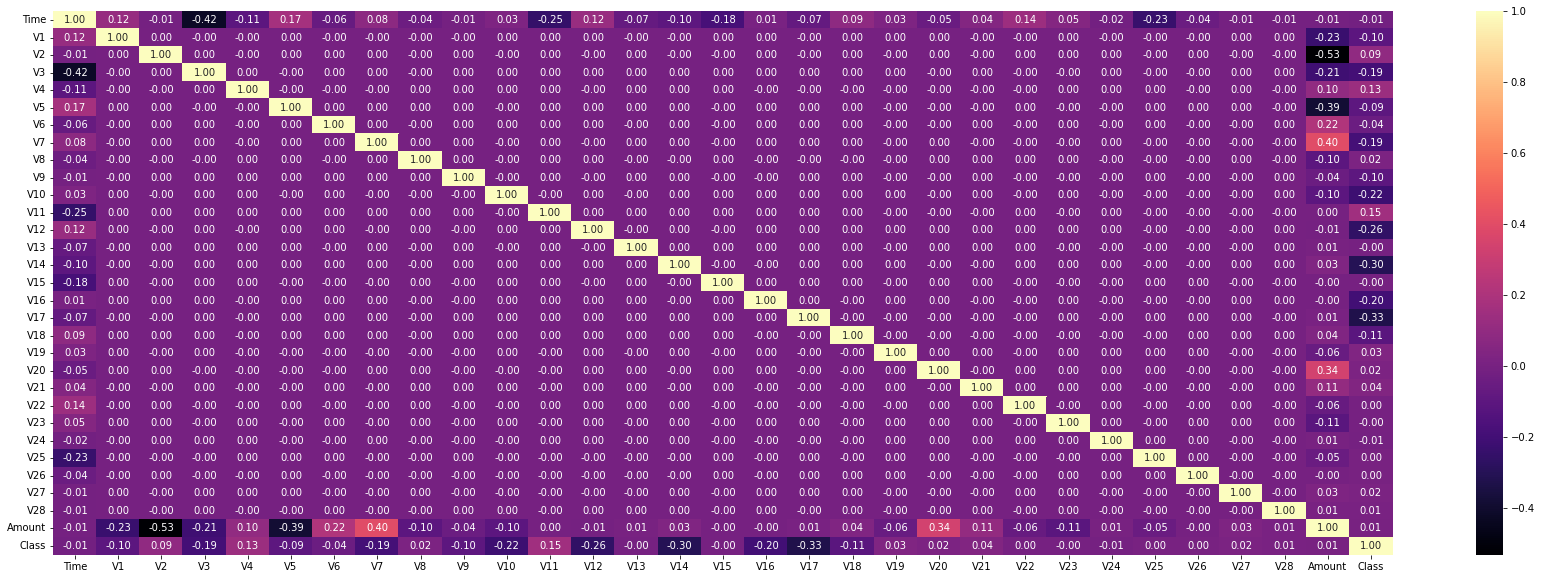

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

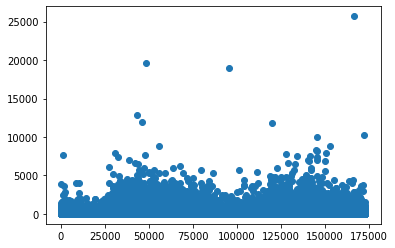

In [ ]:
plt.plot('Time','Amount',data = df,linestyle='none', marker = 'o')
plt.show()

In [ ]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)

0.0017304750013189597


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

##Preprocessing Data

In [ ]:
from sklearn.preprocessing import StandardScaler
x_data = df.drop('Class',axis = 1)
y_data = df['Class']

In [ ]:
sds = StandardScaler()

In [ ]:
x_data_scaled = sds.fit_transform(x_data)

In [ ]:
x_data_scaled

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size = 0.2)

##Building Model##
###Supervised Learning - Classification###

###Logistic Regression###

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgR = LogisticRegression()

In [ ]:
lgR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_hat_lgR = lgR.predict(x_test)

In [ ]:
print(classification_report(y_hat_lgR, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56883
           1       0.63      0.90      0.74        79

    accuracy                           1.00     56962
   macro avg       0.82      0.95      0.87     56962
weighted avg       1.00      1.00      1.00     56962



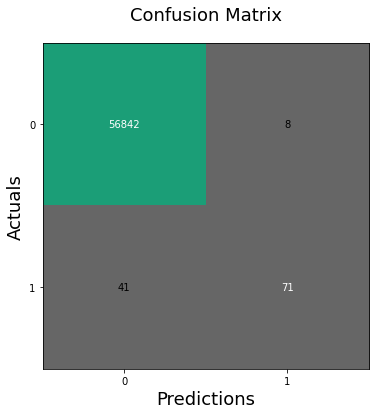

In [ ]:
conf = confusion_matrix(y_test,y_hat_lgR)
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), cmap=plt.cm.Dark2_r)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

###Random Forest###

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_hat_rfc = rfc.predict(x_test)

In [ ]:
print(classification_report(y_hat_rfc, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.78      0.98      0.87        89

    accuracy                           1.00     56962
   macro avg       0.89      0.99      0.93     56962
weighted avg       1.00      1.00      1.00     56962



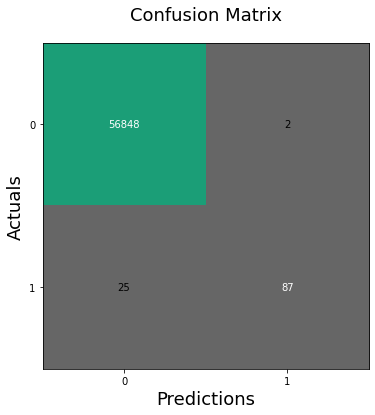

In [ ]:
conf = confusion_matrix(y_test,y_hat_rfc)
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), cmap=plt.cm.Dark2_r)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

###SVM ###


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.65      0.97      0.78        75

    accuracy                           1.00     56962
   macro avg       0.83      0.99      0.89     56962
weighted avg       1.00      1.00      1.00     56962



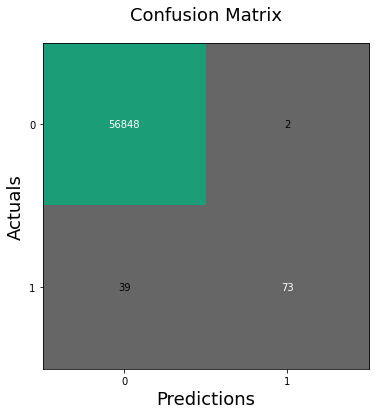

In [ ]:
conf = confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), cmap=plt.cm.Dark2_r)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

###knn###

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_hat_knn = knn.predict(x_test)

In [ ]:
print(classification_report(y_hat_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.80      0.95      0.87        95

    accuracy                           1.00     56962
   macro avg       0.90      0.97      0.93     56962
weighted avg       1.00      1.00      1.00     56962



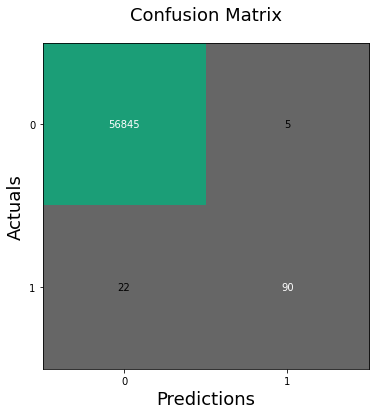

In [ ]:
conf = confusion_matrix(y_test,y_hat_knn)
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), cmap=plt.cm.Dark2_r)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()